## 2.8. Итоговое задание
Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

### Описание датасета

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике

# Рекомендации по выполнению проекта
1. Проведите **первичную обработку** данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на **распределение признака** для числовых переменных, устраните выбросы.
3. Оцените количество **уникальных значений** для номинативных переменных.
4. По необходимости **преобразуйте данные**
5. Проведите **корреляционный анализ** количественных переменных. 
6. Отберите не коррелирующие переменные.
7. Проанализуйте номинативные переменные и устраните те, которые **не влияют** на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте **сформулировать выводы** относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

### Импорт библиотек

In [104]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from itertools import combinations

from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) 

pd.set_option('display.max_columns', 50) 

stud_math = pd.read_csv('stud_math.csv')

### Общий вид

In [105]:
stud_math.info()
stud_math.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Поменяем название колонок на snake_case.

In [106]:
stud_cols=[]
for i in stud_math.columns:
    if i=='studytime, granular':
        i='studytime_granular'
    stud_cols.append(i.lower())
stud_cols

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'pstatus',
 'medu',
 'fedu',
 'mjob',
 'fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'studytime_granular',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score']

In [107]:
stud_math.columns=stud_cols
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Находим статистику по колонкам с численными данными.

In [108]:
stud_math.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
medu,392.0,2.750000,1.098127,0.0,2.0,3.0,4.0,4.0
fedu,371.0,2.614555,2.228732,0.0,2.0,2.0,3.0,40.0
traveltime,367.0,1.438692,0.694181,1.0,1.0,1.0,2.0,4.0
studytime,388.0,2.038660,0.842078,1.0,1.0,2.0,2.0,4.0
failures,373.0,0.337802,0.743135,0.0,0.0,0.0,0.0,3.0
studytime_granular,388.0,-6.115979,2.526235,-12.0,-6.0,-6.0,-3.0,-3.0
famrel,368.0,3.937500,0.927277,-1.0,4.0,4.0,5.0,5.0
freetime,384.0,3.231771,0.993940,1.0,3.0,3.0,4.0,5.0
goout,387.0,3.105943,1.115896,1.0,2.0,3.0,4.0,5.0


Рассмотрим целевой признак.

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


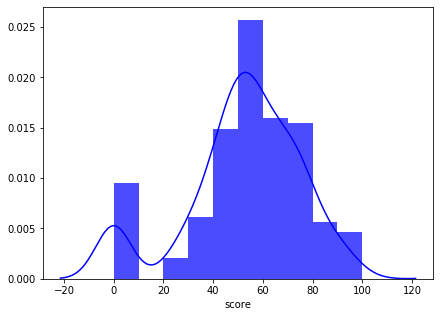

In [109]:
print(stud_math['score'].describe())
plt.figure(figsize=(7, 5))
sns.distplot(stud_math['score'], color='b', bins=10, hist_kws={'alpha': 0.7});

Часть значений=0, т.е. часть студентов не проходила экзамен.

In [110]:
stud_math.score.isnull().sum()

6

Также есть 6 NaN-значений.

In [111]:
stud_math[stud_math.score.isnull()]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


 Дубликаты в датафрейме:

In [112]:
stud_math.shape

(395, 30)

In [113]:
dupl_rows=stud_math[stud_math.duplicated()]
print('Количсетво повторяющихся записей:', dupl_rows)

Количсетво повторяющихся записей: Empty DataFrame
Columns: [school, sex, age, address, famsize, pstatus, medu, fedu, mjob, fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, studytime_granular, higher, internet, romantic, famrel, freetime, goout, health, absences, score]
Index: []


Дублей нет.

### Анализ численных колонок.

In [114]:
def quant_overview(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, verbose=True):
    series = dataframe[y]
    print(series.describe())
    print('='*50)
    print('Мода: ', series.mode())
    print('='*50)
    print('Уникальные значения:\n', series.value_counts())
    print('='*50)
    num_null=series.isnull().sum(), series.isnull().sum()/len(series)
    print('Колличество nan значений', num_null)
    print('='*50)
    IQR = dataframe[y].quantile(0.75) - dataframe[y].quantile(0.25)
    perc25 = dataframe[y].quantile(0.25)
    perc75 = dataframe[y].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    print('='*50)
    
    fig, axs = plt.subplots(ncols=2)
    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=axs[0])
    print('Гистограмма распределения для ', y)
    sns.distplot(dataframe[y].dropna(), ax=axs[1])
    plt.show()

age
count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
Мода:  0    16
dtype: int64
Уникальные значения:
 16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
Колличество nan значений (0, 0.0)
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].
Гистограмма распределения для  age


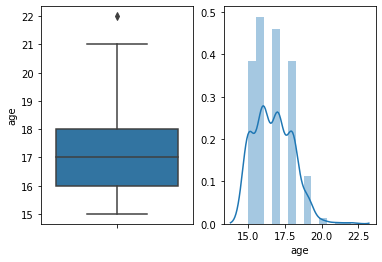

medu
count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64
Мода:  0    4.0
dtype: float64
Уникальные значения:
 4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: medu, dtype: int64
Колличество nan значений (3, 0.007594936708860759)
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].
Гистограмма распределения для  medu


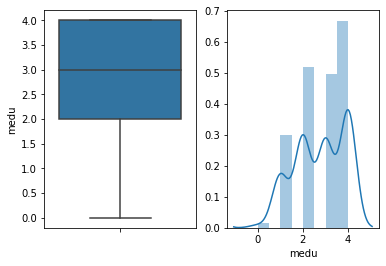

fedu
count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64
Мода:  0    2.0
dtype: float64
Уникальные значения:
 2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64
Колличество nan значений (24, 0.060759493670886074)
25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].
Гистограмма распределения для  fedu


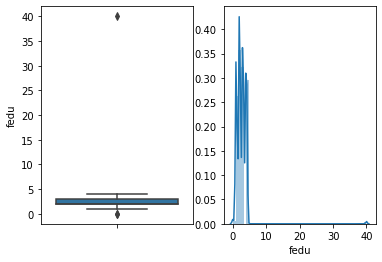

traveltime
count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
Мода:  0    1.0
dtype: float64
Уникальные значения:
 1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64
Колличество nan значений (28, 0.07088607594936709)
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].
Гистограмма распределения для  traveltime


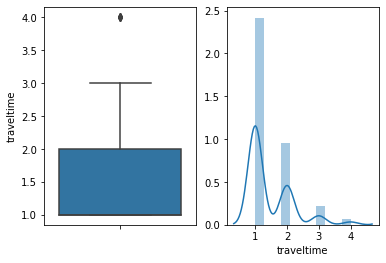

studytime
count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64
Мода:  0    2.0
dtype: float64
Уникальные значения:
 2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64
Колличество nan значений (7, 0.017721518987341773)
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].
Гистограмма распределения для  studytime


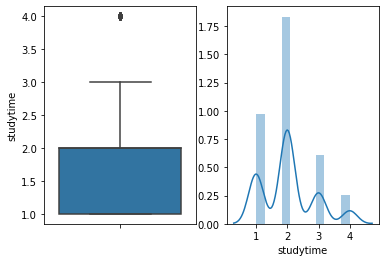

failures
count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
Мода:  0    0.0
dtype: float64
Уникальные значения:
 0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64
Колличество nan значений (22, 0.05569620253164557)
25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].
Гистограмма распределения для  failures


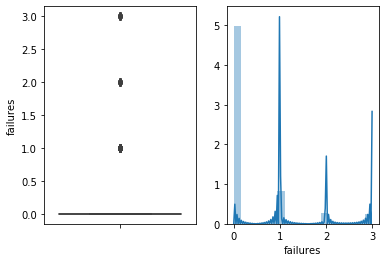

studytime_granular
count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64
Мода:  0   -6.0
dtype: float64
Уникальные значения:
 -6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64
Колличество nan значений (7, 0.017721518987341773)
25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].
Гистограмма распределения для  studytime_granular


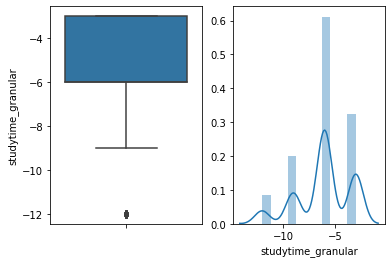

famrel
count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
Мода:  0    4.0
dtype: float64
Уникальные значения:
  4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64
Колличество nan значений (27, 0.06835443037974684)
25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].
Гистограмма распределения для  famrel


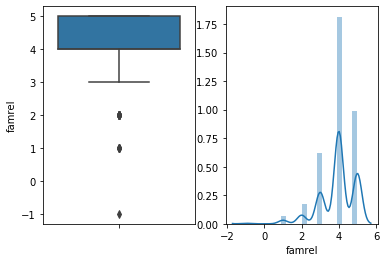

freetime
count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64
Мода:  0    3.0
dtype: float64
Уникальные значения:
 3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64
Колличество nan значений (11, 0.027848101265822784)
25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].
Гистограмма распределения для  freetime


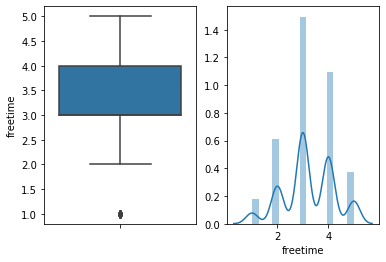

goout
count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
Мода:  0    3.0
dtype: float64
Уникальные значения:
 3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64
Колличество nan значений (8, 0.020253164556962026)
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].
Гистограмма распределения для  goout


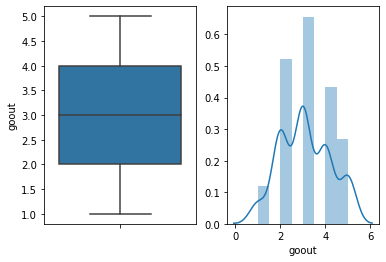

health
count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
Мода:  0    5.0
dtype: float64
Уникальные значения:
 5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64
Колличество nan значений (15, 0.0379746835443038)
25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].
Гистограмма распределения для  health


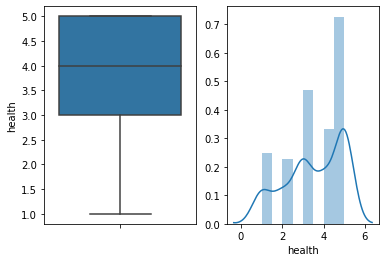

absences
count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
Мода:  0    0.0
dtype: float64
Уникальные значения:
 0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64
Колличество nan значений (12, 0.030379746835443037)
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
Гистограмма распределения для  absences


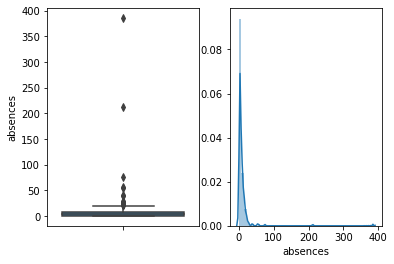

score
count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
Мода:  0    50.0
dtype: float64
Уникальные значения:
 50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64
Колличество nan значений (6, 0.015189873417721518)
25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].
Гистограмма распределения для  score


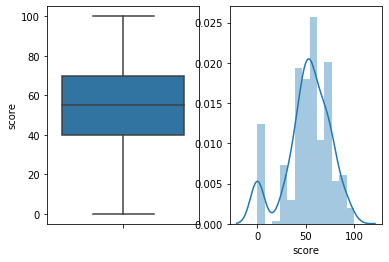

In [115]:
for col in ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'studytime_granular', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']:
    print('='*50)
    print(col)
    print('='*50)
    quant_overview(dataframe= stud_math, y = col, palette=sns.color_palette(), verbose=True)

### Обработка NaN 
Во всех колонках,кроме age есть NaN-значения, заменим их на моду. Колонку score пока не трогаем.

In [116]:
for col in ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'studytime_granular', 'famrel', 'freetime', 'goout', 'health', 'absences']:
    stud_math[col].fillna(stud_math[col].mode()[0], inplace=True)

Выброс в fedu 40 - считаем опечаткой.

In [117]:
stud_math.loc[stud_math.fedu==40.0, 'fedu']=4.0

Выброс в famrel - читаем -1 опечаткой.

In [118]:
stud_math.loc[stud_math.famrel==-1.0, 'famrel']=1.0

In [119]:
stud_math.famrel.value_counts()

4.0    209
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

Выбросы в колонке absences.

In [120]:
stud_math[stud_math['absences']>150]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


Считаем, что эти значения слишком велики, удаляем из датасета.

In [121]:
stud_math.drop(stud_math[stud_math.absences>150].index, inplace=True)

In [122]:
stud_math.shape

(393, 30)

Гистограммы после обработки числовых данных.

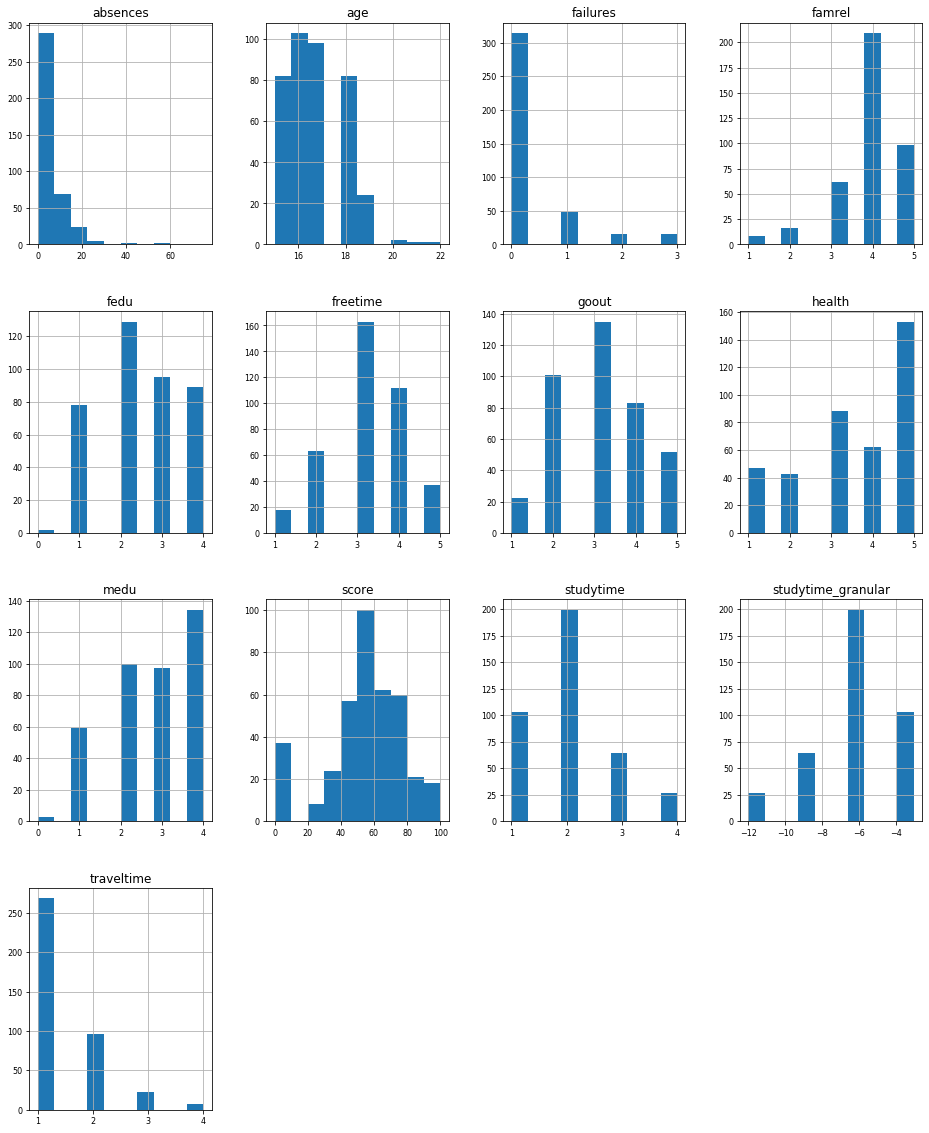

In [123]:
stud_math.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8);

### Анализ корреляции.

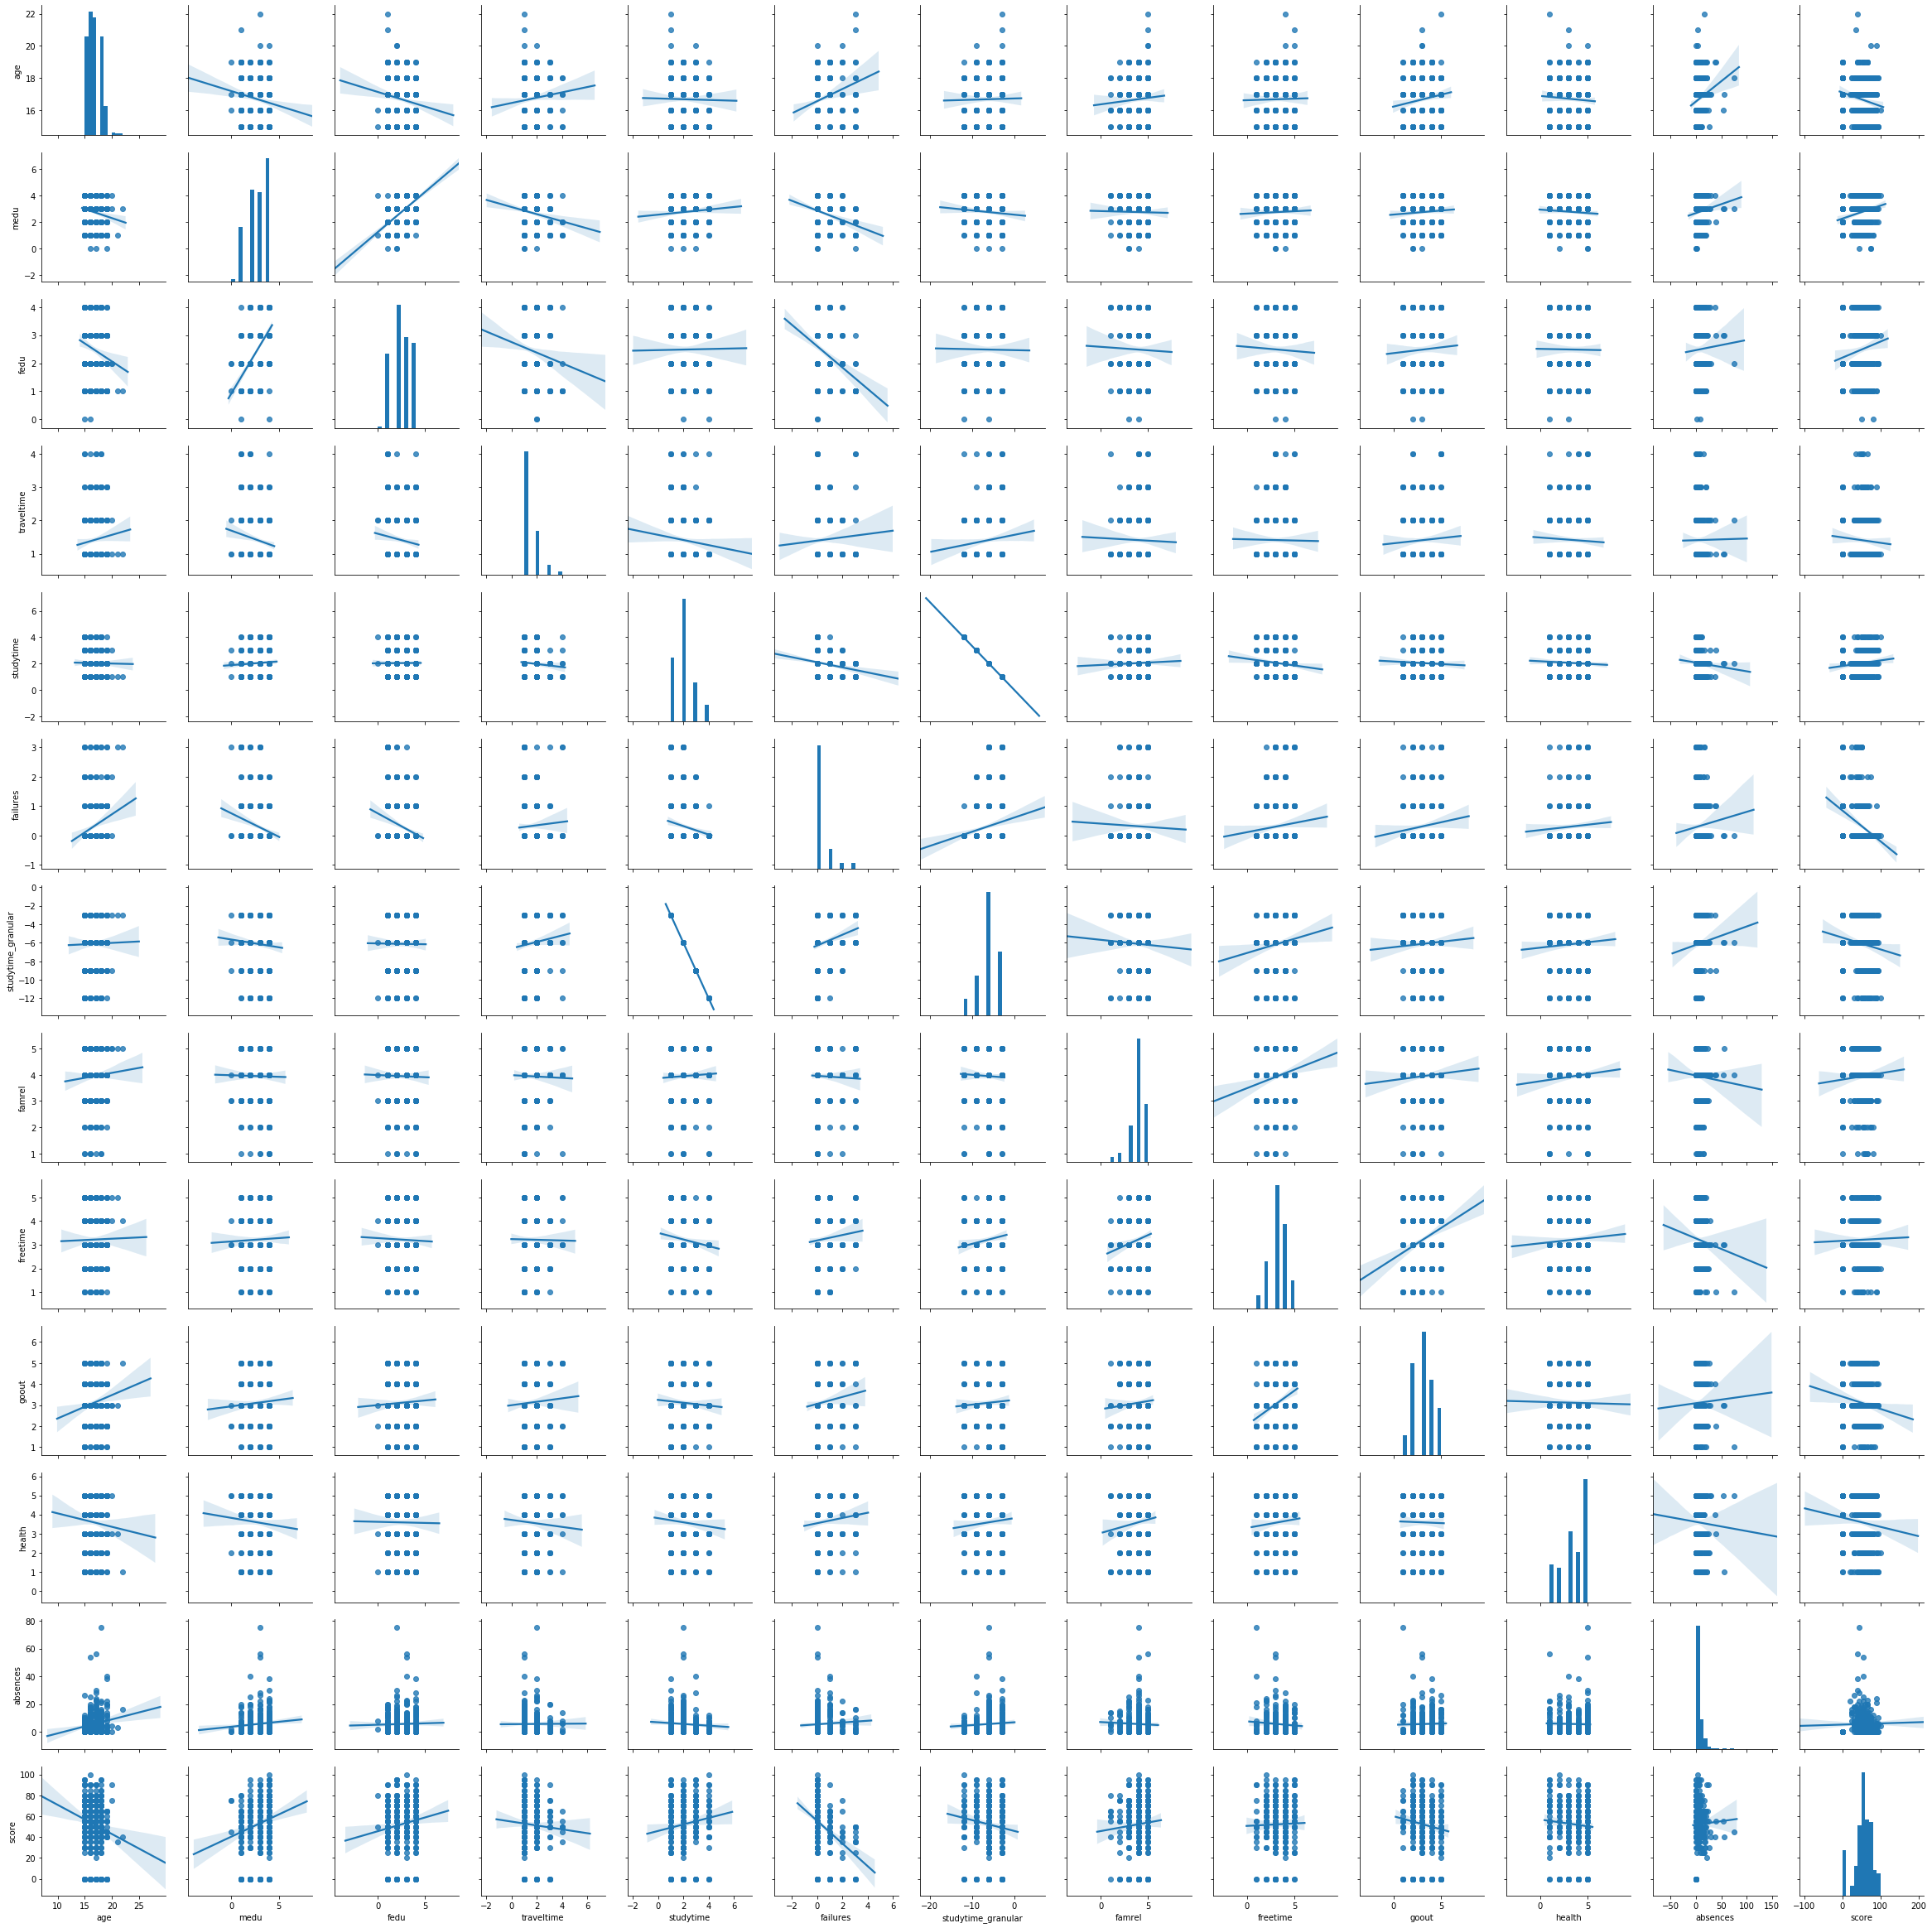

In [124]:
sns.pairplot(stud_math, kind = 'reg')

In [125]:
stud_math.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.158786,-0.152554,0.088761,-0.015255,0.215679,0.015255,0.055183,0.014402,0.127950,-0.063616,0.159247,-0.153488
medu,-0.158786,1.000000,0.588252,-0.166756,0.073536,-0.242526,-0.073536,-0.015315,0.032163,0.060892,-0.066730,0.097745,0.203759
fedu,-0.152554,0.588252,1.000000,-0.120768,0.007762,-0.259445,-0.007762,-0.020112,-0.027617,0.042622,-0.009011,0.027224,0.123111
traveltime,0.088761,-0.166756,-0.120768,1.000000,-0.094864,0.052967,0.094864,-0.020799,-0.010127,0.050421,-0.044573,0.005807,-0.055020
studytime,-0.015255,0.073536,0.007762,-0.094864,1.000000,-0.167568,-1.000000,0.037830,-0.119337,-0.051498,-0.064897,-0.063304,0.114737
failures,0.215679,-0.242526,-0.259445,0.052967,-0.167568,1.000000,0.167568,-0.027212,0.084878,0.108124,0.070821,0.057466,-0.337138
studytime_granular,0.015255,-0.073536,-0.007762,0.094864,-1.000000,0.167568,1.000000,-0.037830,0.119337,0.051498,0.064897,0.063304,-0.114737
famrel,0.055183,-0.015315,-0.020112,-0.020799,0.037830,-0.027212,-0.037830,1.000000,0.160481,0.061778,0.087658,-0.038293,0.062745
freetime,0.014402,0.032163,-0.027617,-0.010127,-0.119337,0.084878,0.119337,0.160481,1.000000,0.290287,0.062987,-0.072739,0.019910
goout,0.127950,0.060892,0.042622,0.050421,-0.051498,0.108124,0.051498,0.061778,0.290287,1.000000,-0.016017,0.024777,-0.121098


studytime_granular является производной от studytime, можно оставить только одну из них.

### Номинативные признаки.

In [126]:
def categor_overview(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('Мода: ', series.mode())
    print('Колличество nan значений', series.isnull().sum(), series.isnull().sum()/len(series))
    print('='*50)
    if verbose:
        print('='*50)
        print(series.value_counts())
    sns.catplot(x=x, kind='count', data=dataframe, palette=palette, height=4, aspect=1)
    sns.catplot(x=x, y=y, kind="swarm", data=dataframe, height=4, aspect=1);
    plt.show()

school
count     393
unique      2
top        GP
freq      348
Name: school, dtype: object
Мода:  0    GP
dtype: object
Колличество nan значений 0 0.0
GP    348
MS     45
Name: school, dtype: int64


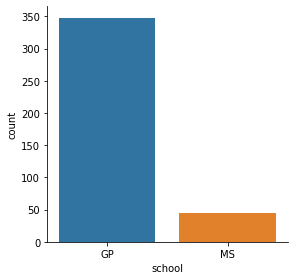

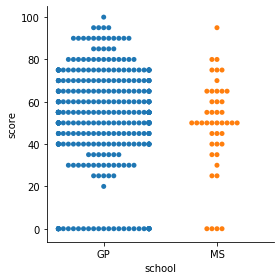

sex
count     393
unique      2
top         F
freq      207
Name: sex, dtype: object
Мода:  0    F
dtype: object
Колличество nan значений 0 0.0
F    207
M    186
Name: sex, dtype: int64


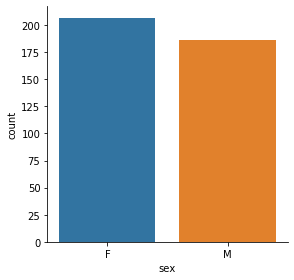

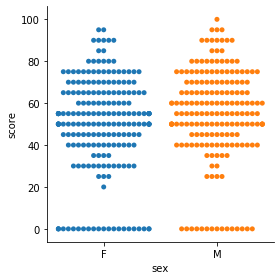

address
count     376
unique      2
top         U
freq      293
Name: address, dtype: object
Мода:  0    U
dtype: object
Колличество nan значений 17 0.043256997455470736
U    293
R     83
Name: address, dtype: int64


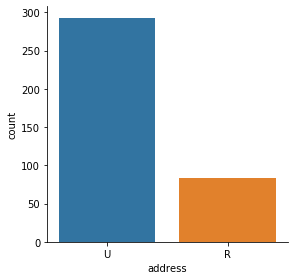

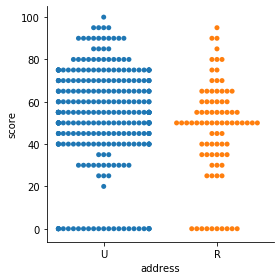

famsize
count     366
unique      2
top       GT3
freq      260
Name: famsize, dtype: object
Мода:  0    GT3
dtype: object
Колличество nan значений 27 0.06870229007633588
GT3    260
LE3    106
Name: famsize, dtype: int64


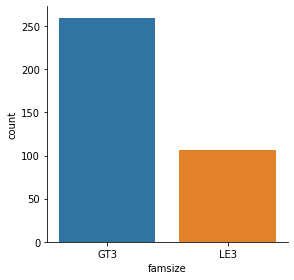

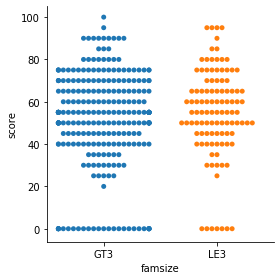

pstatus
count     348
unique      2
top         T
freq      313
Name: pstatus, dtype: object
Мода:  0    T
dtype: object
Колличество nan значений 45 0.11450381679389313
T    313
A     35
Name: pstatus, dtype: int64


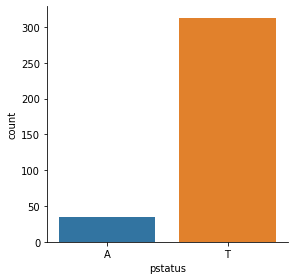

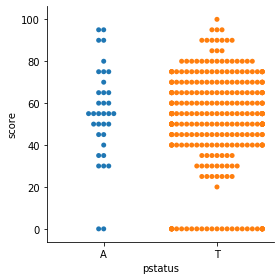

mjob
count       374
unique        5
top       other
freq        133
Name: mjob, dtype: object
Мода:  0    other
dtype: object
Колличество nan значений 19 0.04834605597964377
other       133
services     96
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64


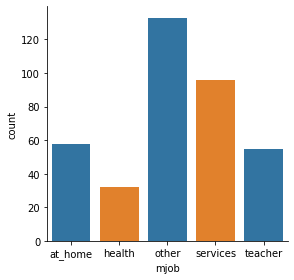

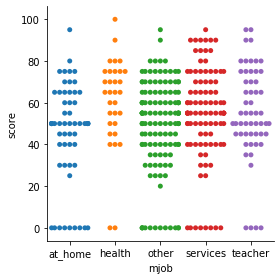

fjob
count       357
unique        5
top       other
freq        197
Name: fjob, dtype: object
Мода:  0    other
dtype: object
Колличество nan значений 36 0.0916030534351145
other       197
services    101
teacher      28
at_home      16
health       15
Name: fjob, dtype: int64


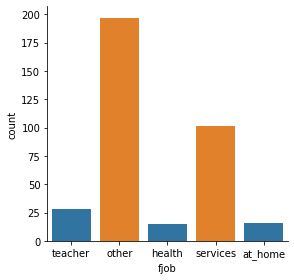

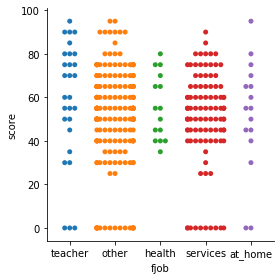

reason
count        376
unique         4
top       course
freq         136
Name: reason, dtype: object
Мода:  0    course
dtype: object
Колличество nan значений 17 0.043256997455470736
course        136
home          104
reputation    103
other          33
Name: reason, dtype: int64


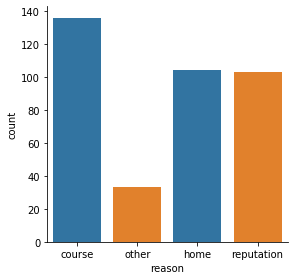

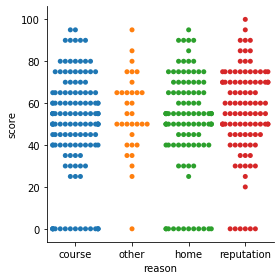

guardian
count        363
unique         3
top       mother
freq         249
Name: guardian, dtype: object
Мода:  0    mother
dtype: object
Колличество nan значений 30 0.07633587786259542
mother    249
father     86
other      28
Name: guardian, dtype: int64


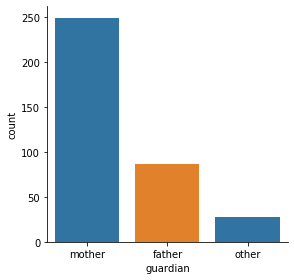

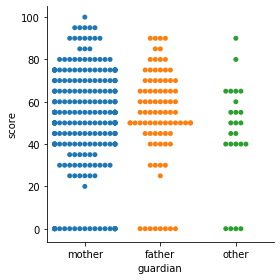

schoolsup
count     384
unique      2
top        no
freq      334
Name: schoolsup, dtype: object
Мода:  0    no
dtype: object
Колличество nan значений 9 0.022900763358778626
no     334
yes     50
Name: schoolsup, dtype: int64


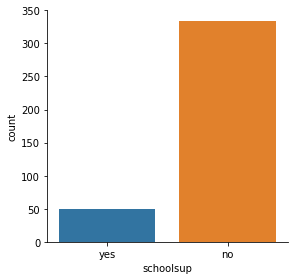

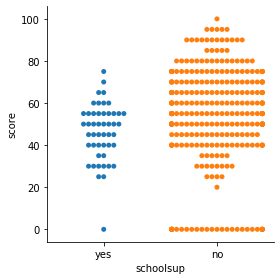

famsup
count     355
unique      2
top       yes
freq      218
Name: famsup, dtype: object
Мода:  0    yes
dtype: object
Колличество nan значений 38 0.09669211195928754
yes    218
no     137
Name: famsup, dtype: int64


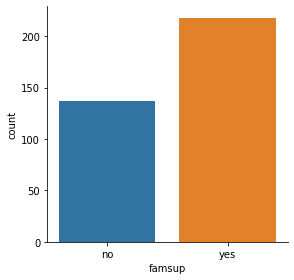

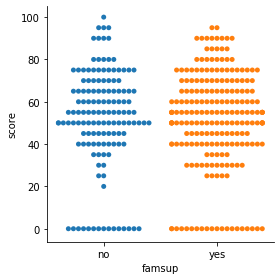

paid
count     353
unique      2
top        no
freq      199
Name: paid, dtype: object
Мода:  0    no
dtype: object
Колличество nan значений 40 0.10178117048346055
no     199
yes    154
Name: paid, dtype: int64


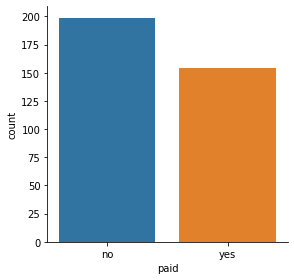

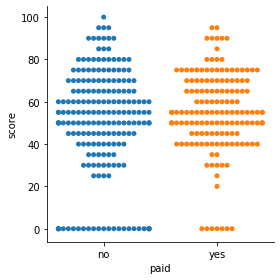

activities
count     379
unique      2
top       yes
freq      195
Name: activities, dtype: object
Мода:  0    yes
dtype: object
Колличество nan значений 14 0.035623409669211195
yes    195
no     184
Name: activities, dtype: int64


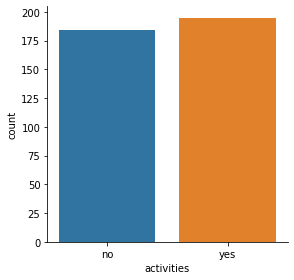

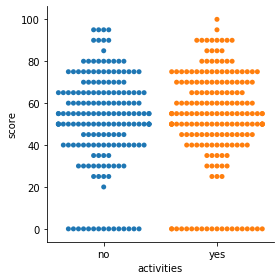

nursery
count     377
unique      2
top       yes
freq      298
Name: nursery, dtype: object
Мода:  0    yes
dtype: object
Колличество nan значений 16 0.04071246819338423
yes    298
no      79
Name: nursery, dtype: int64


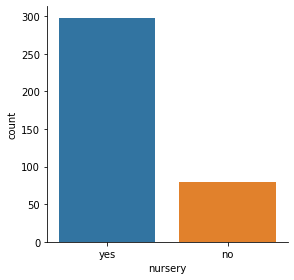

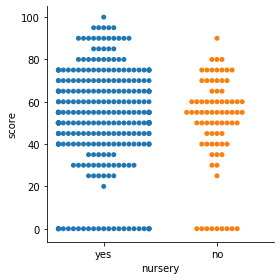

higher
count     373
unique      2
top       yes
freq      354
Name: higher, dtype: object
Мода:  0    yes
dtype: object
Колличество nan значений 20 0.05089058524173028
yes    354
no      19
Name: higher, dtype: int64


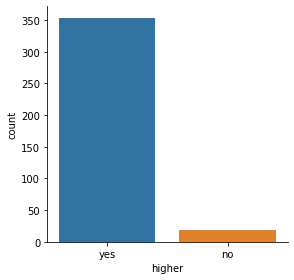

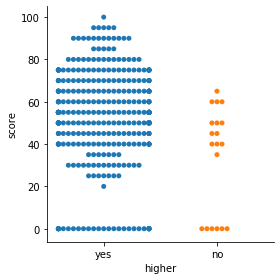

internet
count     359
unique      2
top       yes
freq      304
Name: internet, dtype: object
Мода:  0    yes
dtype: object
Колличество nan значений 34 0.08651399491094147
yes    304
no      55
Name: internet, dtype: int64


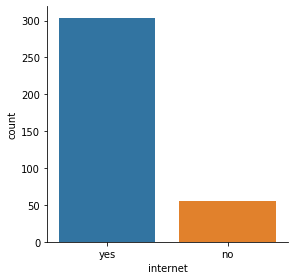

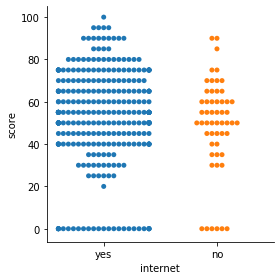

romantic
count     362
unique      2
top        no
freq      238
Name: romantic, dtype: object
Мода:  0    no
dtype: object
Колличество nan значений 31 0.07888040712468193
no     238
yes    124
Name: romantic, dtype: int64


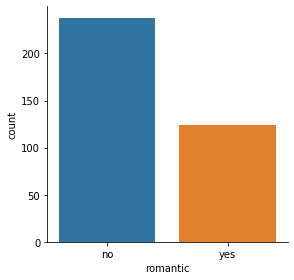

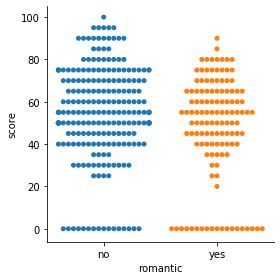

In [127]:
c_palette = ['tab:blue', 'tab:orange'] 
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    print('='*50)
    print(col)
    print('='*50)
    categor_overview(stud_math, x=col, y='score', palette=c_palette, verbose=True)

Обработка NaN-значений для номинативных переменных.

In [128]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    stud_math[col].fillna(stud_math[col].mode()[0], inplace=True)

In [129]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (5, 4))
    sns.boxplot(x=column, y='score', 
                 data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()

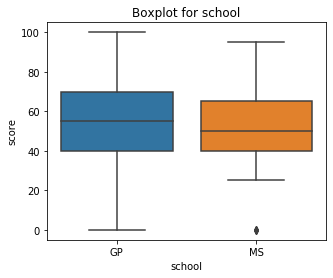

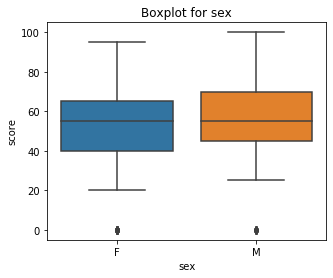

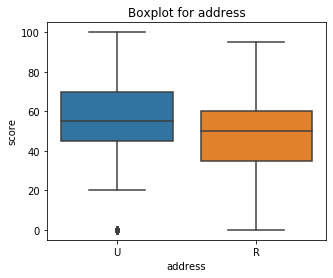

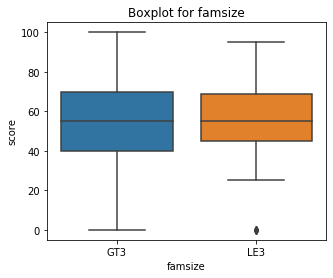

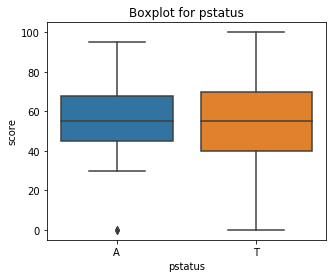

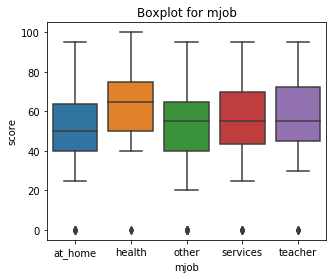

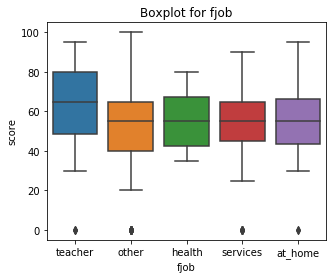

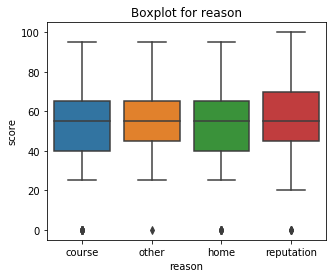

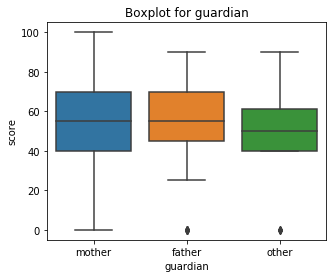

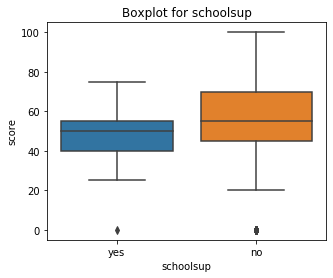

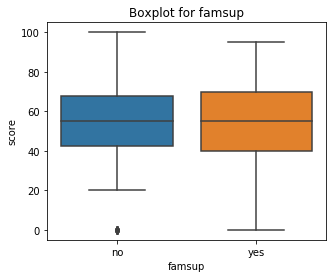

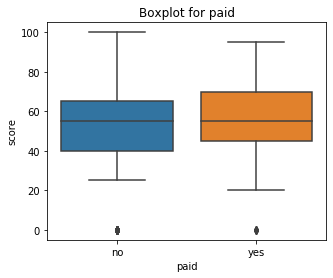

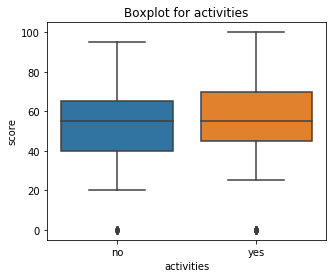

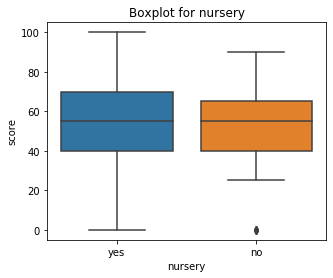

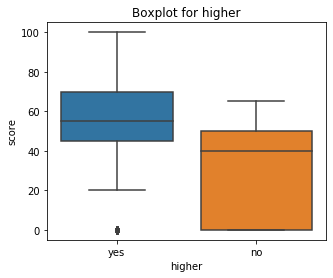

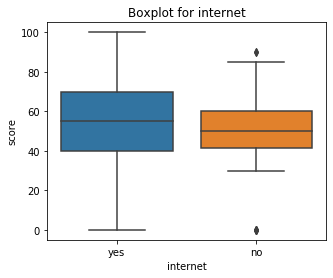

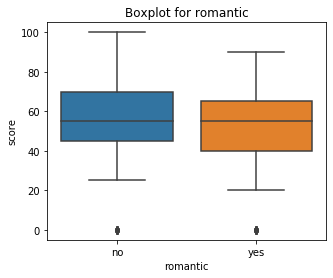

In [130]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

#### Тест Стьюдента. 
Проверим нулевую гипотезу о том, что распределения оценок в тесте по математике по различным параметрам неразличимы:

In [131]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
        else:
            print('Стистически значимых различий для ', column, 'не найдено.')

In [132]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Стистически значимых различий для  school не найдено.
Стистически значимых различий для  sex не найдено.
Стистически значимых различий для  address не найдено.
Стистически значимых различий для  famsize не найдено.
Стистически значимых различий для  pstatus не найдено.
Стистически значимых различий для  mjob не найдено.
Стистически значимых различий для  mjob не найдено.
Стистически значимых различий для  mjob не найдено.
Стистически значимых различий для  mjob не найдено.
Стистически значимых различий для  mjob не найдено.
Стистически значимых различий для  mjob не найдено.
Стистически значимых различий для  mjob не найдено.
Стистически значимых различий для  mjob не найдено.
Стистически значимых различий для  mjob не найдено.
Стистически значимых различий для  mjob не найдено.
Стистически значимых различий для  fjob не найдено.
Стистически значимых различий для  fjob не найдено.
Стистически значимых различий для  fjob не найдено.
Стистически значимых различий для  fjob не найдено.
Ст

Как мы видим для всех номинативных признаков статистически значимых различий не найдено, т.е. мы можем удалить все эти признаки из датафрейма для построения модели.

Ранее при анализе целевого признака score мы нашли, что 37 наблюдений имеет значение 0 и еще в 6 наблюдений имеет значение NaN. 

In [134]:
stud_math[stud_math['score']==0].count()

school                37
sex                   37
age                   37
address               37
famsize               37
pstatus               37
medu                  37
fedu                  37
mjob                  37
fjob                  37
reason                37
guardian              37
traveltime            37
studytime             37
failures              37
schoolsup             37
famsup                37
paid                  37
activities            37
nursery               37
studytime_granular    37
higher                37
internet              37
romantic              37
famrel                37
freetime              37
goout                 37
health                37
absences              37
score                 37
dtype: int64

Если задачей построения модели будет предсказание целевого признака, то все эти значения можно также удалить из датафрейма.

In [135]:
stud_math.shape

(393, 30)

In [147]:
stud_math.drop(stud_math[stud_math.score.isnull()].index, inplace=True)

In [148]:
stud_math.shape

(350, 30)

In [149]:
stud_math.drop(stud_math[stud_math.score==0].index, inplace=True)

In [150]:
stud_math.shape

(350, 30)

In [151]:
math_for_model=stud_math.loc[:, ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']]
math_for_model.head(10)

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
5,16,4.0,3.0,1.0,2.0,0.0,5.0,4.0,2.0,5.0,10.0,75.0
6,16,2.0,2.0,1.0,2.0,0.0,4.0,4.0,4.0,3.0,0.0,55.0
7,17,4.0,4.0,2.0,2.0,0.0,4.0,1.0,4.0,1.0,6.0,30.0
8,15,3.0,2.0,1.0,2.0,0.0,4.0,2.0,2.0,1.0,0.0,95.0
9,15,3.0,4.0,1.0,2.0,0.0,5.0,5.0,1.0,5.0,0.0,75.0


In [152]:
math_for_model.shape

(350, 12)

### Выводы:
1. В данных было большое количество пустых значений, что ожидаемо, т.к. респонденты - подростки.
2. Выбросы найдены только в столбцах absences, famrel и fedu, причем в 2х последних случаях, это явные опечатки, что позволяет сделать вывод о том, что данные достаточно чистые.
3. Назначение колонки studytime_granular осталось не известным. Эта колонка является производной от studytime, но в условиях задачи не упомянута, поэтому удалена из окончательного датасета.
4. Т.к. часть значений целевого признака имела значение 0 и NaN, эти наблюдения также пришлось удалить.